# ML 심화 과제

2021.01.26 18기 문헌정보학과 김채형

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

/usr/local/var/pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### 0. Titanic 데이터 로드 및 훑어보기

In [2]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!

titanic.dropna(inplace=True)
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [5]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

titanic = pd.get_dummies(titanic)
titanic.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
10,1,3,4.0,1,1,16.7000,1,0,0,0,1
11,1,1,58.0,0,0,26.5500,1,0,0,0,1


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    183 non-null    int64  
 1   Pclass      183 non-null    int64  
 2   Age         183 non-null    float64
 3   SibSp       183 non-null    int64  
 4   Parch       183 non-null    int64  
 5   Fare        183 non-null    float64
 6   Sex_female  183 non-null    uint8  
 7   Sex_male    183 non-null    uint8  
 8   Embarked_C  183 non-null    uint8  
 9   Embarked_Q  183 non-null    uint8  
 10  Embarked_S  183 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 10.9 KB


### 1. Train-Test split & 종속변수-설명변수 분할

In [7]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(146, 10) (37, 10) (146,) (37,)


### 2. Decision Tree를 통한 Classification

In [8]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.

import math

pclass = titanic['Pclass']
y = titanic['Survived']

# root node entropy 계산
levels = y.unique()
res = 0
for level in levels:
    p = len(y[y==level])/len(y) 
    res += p*math.log(p, 2)
root_entr = -res

# child node entropy 계산
p = y.groupby(pclass).sum()/y.groupby(pclass).count()
child_entr = []
for x in p.values:
    p = -(x*math.log(x, 2) + (1-x)*math.log(1-x, 2))
    child_entr.append(p)

# information gain 계산
weight = y.groupby(pclass).count().values
info_gain = root_entr - sum(weight*child_entr)/len(y)
print('Information Gain :', info_gain)

Information Gain : 0.0097623191501931


In [9]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

In [10]:
"""
from sklearn.tree import export_graphviz

export_graphviz(model,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))
"""

'\nfrom sklearn.tree import export_graphviz\n\nexport_graphviz(model,\n                out_file=("titanic_hw.dot"),\n                feature_names=X_train.columns,\n                class_names=[\'0\',\'1\'],\n                rounded=True,\n                filled=True)\n\nimport graphviz\nimport os\n\nos.environ["PATH"] += os.pathsep + \'C:/graphviz-2.38/release/bin\'\n\nwith open("titanic_hw.dot") as f:\n    dot_graph = f.read()\n    display(graphviz.Source(dot_graph))\n'

### 4. 결과 확인

Accuracy : 0.7027027027027027
F1 score : 0.7317073170731708
ROC AUC score : 0.7061403508771931
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.65      0.83      0.73        18

    accuracy                           0.70        37
   macro avg       0.72      0.71      0.70        37
weighted avg       0.72      0.70      0.70        37



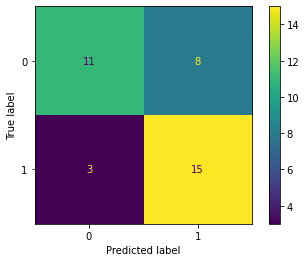

In [11]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

print('Accuracy :', accuracy_score(y_test, y_pred))
print('F1 score :', f1_score(y_pred, y_test))
print('ROC AUC score :', roc_auc_score(y_test, y_pred))
print(plot_confusion_matrix(model, X_test, y_test))
print(classification_report(y_test, y_pred))

### 5. GridSearch를 통한 Tree pruning

In [12]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.

from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": range(1, 10, 5), 
              "min_samples_leaf": range(2, 10, 5),
              "min_samples_split": range(2, 10, 5)}
model_grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='f1')
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

In [13]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.

print(model_grid.best_params_)
print(model_grid.best_score_)
print('F1 score:', f1_score(y_test, y_pred))

{'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 7}
0.8475635997375127
F1 score: 0.7317073170731708


In [14]:
## GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
## ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
## hint) Shift+tab

- max_depth : tree의 최대 깊이
- min_samples_leaf : 리프노드가 되기 위한 데이터의 최소 개수
- min_samples_split : 노드를 분할하기 위한 데이터의 최소 개수

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!